https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [3]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [4]:
# valores
df.value_counts()

year  month  day  week   temp_2  temp_1  average  actual  forecast_noaa  forecast_acc  forecast_under  friend
2016  12     31   Sat    48      57      45.5     40      42             48            47              57        1
      1      1    Fri    45      45      45.6     45      43             50            44              29        1
             2    Sat    44      45      45.7     44      41             50            44              61        1
             3    Sun    45      44      45.8     41      43             46            47              56        1
             4    Mon    44      41      45.9     40      44             48            46              53        1
                                                                                                                ..
             17   Sun    48      54      47.4     50      45             51            46              47        1
             16   Sat    49      48      47.3     54      45             52          

In [9]:
# clases

array(['Fri', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['week'] = le.fit_transform(df['week'])


In [6]:
# dummies
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,0,45,45,45.6,45,43,50,44,29
1,2016,1,2,2,44,45,45.7,44,41,50,44,61
2,2016,1,3,3,45,44,45.8,41,43,46,47,56
3,2016,1,4,1,44,41,45.9,40,44,48,46,53
4,2016,1,5,5,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5,42,42,45.2,47,41,50,47,47
344,2016,12,28,6,42,47,45.3,48,41,49,44,58
345,2016,12,29,4,47,48,45.3,48,43,50,45,65
346,2016,12,30,0,48,48,45.4,57,44,46,44,42


In [14]:
# 'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6

In [15]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


In [7]:
# agurpar por mes y quedarse con la media de la columna temp_1
df.groupby('month')[['temp_1']].mean()

,temp_1
month,
1,49.677419
2,54.115385
3,56.483871
4,66.433333
5,68.838710
6,73.233333
7,76.225806
8,77.947368
9,70.428571


In [8]:
# merge del dataframe anterior con el original
pair = df[['actual','temp_1']]

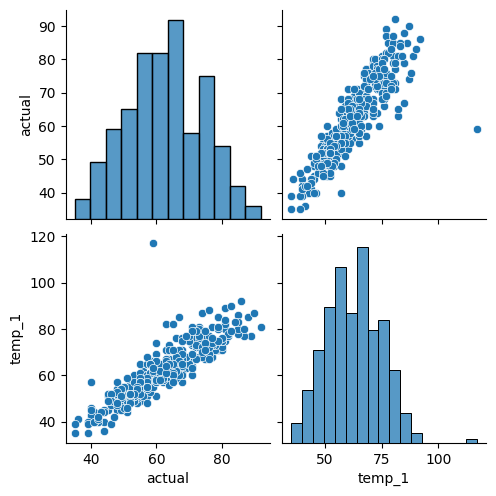

In [9]:
import seaborn as sns
sns.pairplot(pair);

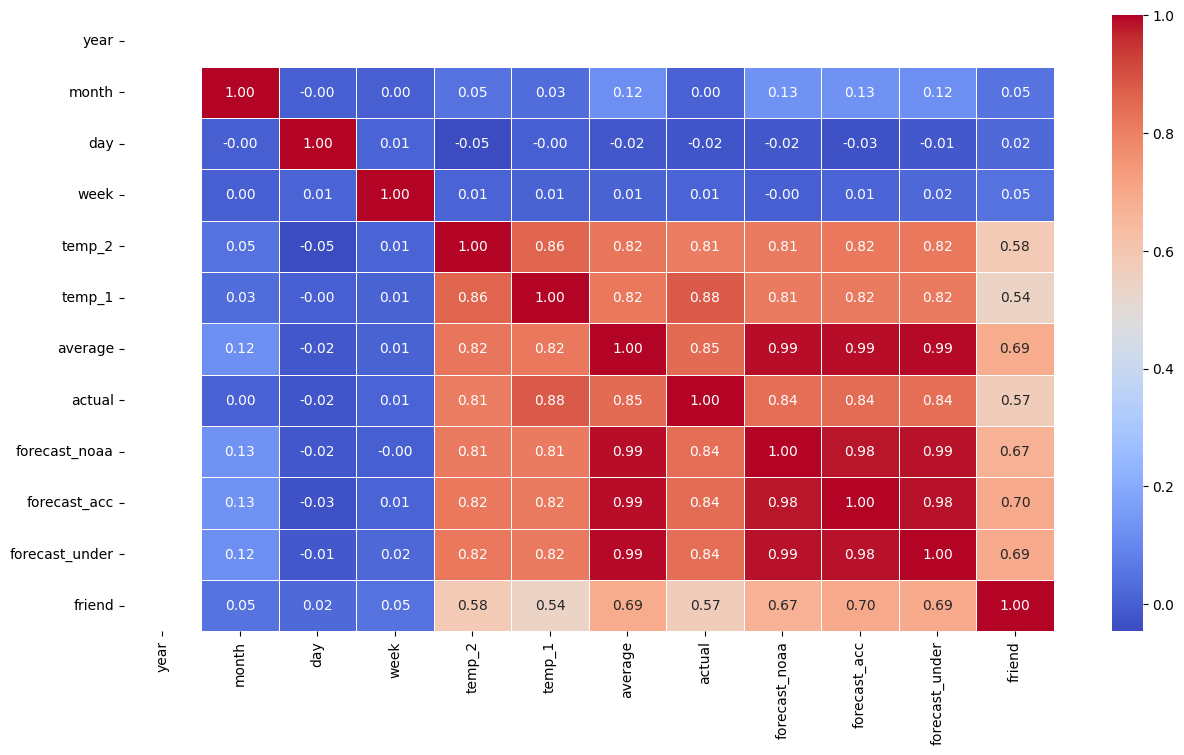

In [10]:
import matplotlib.pyplot as plt
correl = df.select_dtypes('number')
plt.figure(figsize=(15,8))
sns.heatmap(data=correl.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5);

### 3. Divide en train y test

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='actual')
y = df['actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Entrena el modelo


In [12]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [13]:
X_train.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [14]:
dtr.feature_importances_

array([0.        , 0.02020481, 0.01927103, 0.01219773, 0.01530064,
       0.76043489, 0.09463524, 0.01624274, 0.01489342, 0.02963936,
       0.01718014])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [16]:
y_pred = dtr.predict(X_test)
y_pred

array([79., 61., 53., 68., 72., 63., 71., 73., 68., 81., 62., 67., 40.,
       63., 70., 55., 59., 57., 56., 79., 63., 55., 70., 55., 63., 49.,
       66., 45., 59., 82., 66., 68., 55., 79., 73., 60., 51., 57., 67.,
       49., 77., 60., 81., 41., 63., 85., 59., 85., 51., 40., 45., 42.,
       64., 64., 71., 60., 55., 64., 51., 59., 60., 51., 57., 71., 61.,
       57., 76., 67., 80., 42.])

In [17]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7331363917658187
MAE 4.514285714285714
MAPE 0.07178457920534997
MSE 37.31428571428572
RMSE 6.108542028527406


### 6. Representa el árbol de decision

In [18]:
plt.figure(figsize=(20,30))

plot_tree(dtr, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

InvalidParameterError: The 'class_names' parameter of plot_tree must be an array-like, an instance of 'bool' or an instance of 'numpy.bool' or None. Got 'actual' instead.

<Figure size 2000x3000 with 0 Axes>

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [19]:
dtr2 = DecisionTreeRegressor(max_depth=3)
dtr2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [21]:
y_pred = dtr2.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7560526120516178
MAE 4.5567196265742504
MAPE 0.07147155657048516
MSE 34.11001819765438
RMSE 5.840378258097191


### 9. Vuelve a representar su árbol

In [23]:
plt.figure(figsize=(15,15))

plot_tree(dtr2, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

InvalidParameterError: The 'class_names' parameter of plot_tree must be an array-like, an instance of 'bool' or an instance of 'numpy.bool' or None. Got 'actual' instead.

<Figure size 1500x1500 with 0 Axes>

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [24]:
dtr2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.88020751, 0.08841159, 0.        , 0.01060993, 0.02077097,
       0.        ])

In [25]:
X_train.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [26]:
pd.DataFrame({'features':X_train.columns, 'importances':dtr2.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
5,temp_1,0.880208
6,average,0.088412
9,forecast_under,0.020771
8,forecast_acc,0.010610
2,day,0.000000
0,year,0.000000
1,month,0.000000
3,week,0.000000
4,temp_2,0.000000
7,forecast_noaa,0.000000


In [69]:
X_train, X_test, y_train, y_test = train_test_split(df[['temp_1_x','average','forecast_under']], df['actual'], test_size=0.2, random_state=42)

In [27]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [28]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7560526120516178
MAE 4.5567196265742504
MAPE 0.07147155657048516
MSE 34.11001819765438
RMSE 5.840378258097191


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

In [ ]:
from sklearn.tree import DecisionTreeClassifier

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


In [32]:
df['target_clas'] = (df['actual'] < 59).astype(int)
X = df.drop(columns=['actual', 'target_clas'])  
y = df['target_clas']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

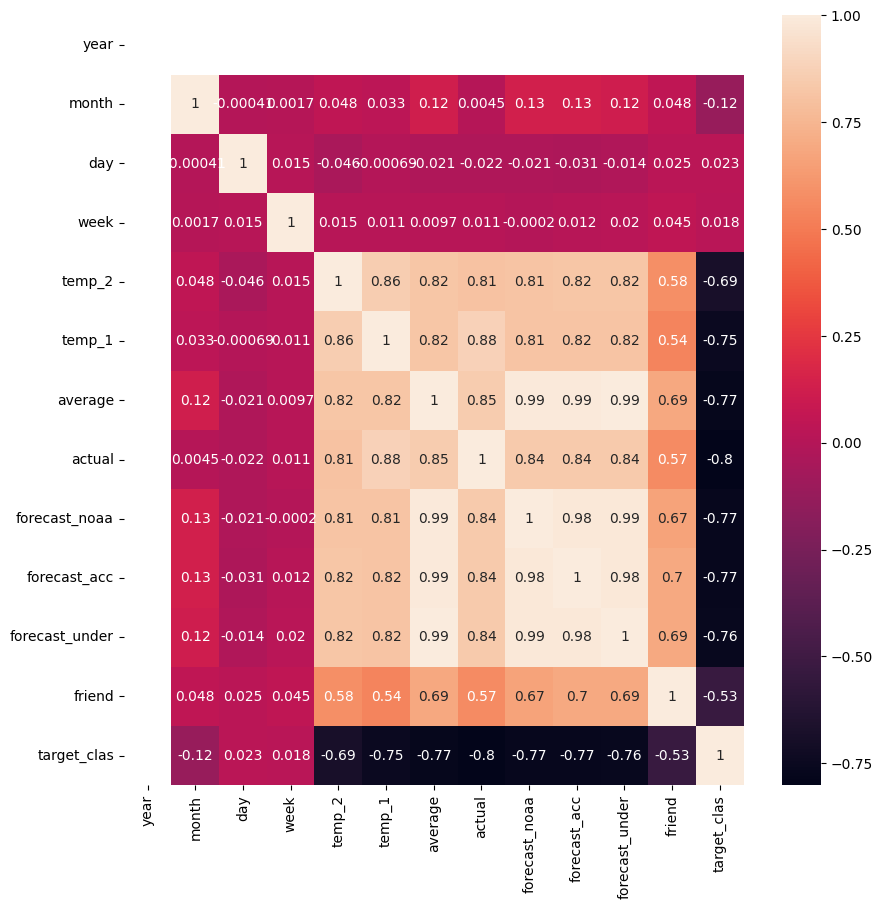

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [81]:
df['target_clas'].value_counts()

1    204
0    144
Name: target_clas, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [88]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [94]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [93]:
dtc.feature_importances_

array([0.        , 0.        , 0.08751759, 0.83792502, 0.05793051,
       0.        , 0.01076818, 0.0058587 , 0.        ])

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test))

0.9

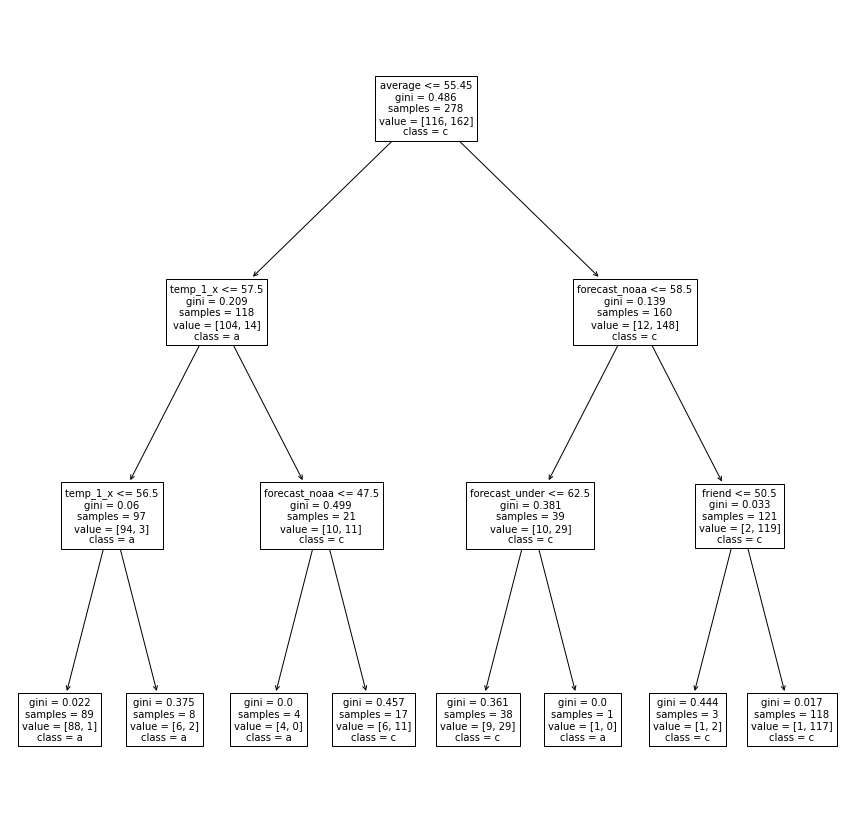

In [90]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

accuracy_score(y_test,lr.predict(X_test))

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8428571428571429

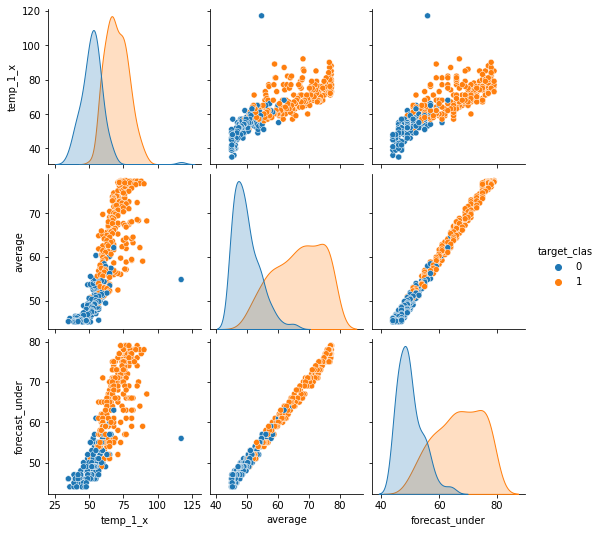

In [97]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')